## Example for [break_axes]()

In [2]:
import matplotlib.pyplot as plt

from break_axes import __version__, scale_axes, broken_and_clip_axes

plt.rcParams['figure.figsize'] = (3,3)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.linewidth'] = 1.5

print(f"break_axes version: {__version__}")

break_axes version: 0.1.0


## Multiple Broken Axes


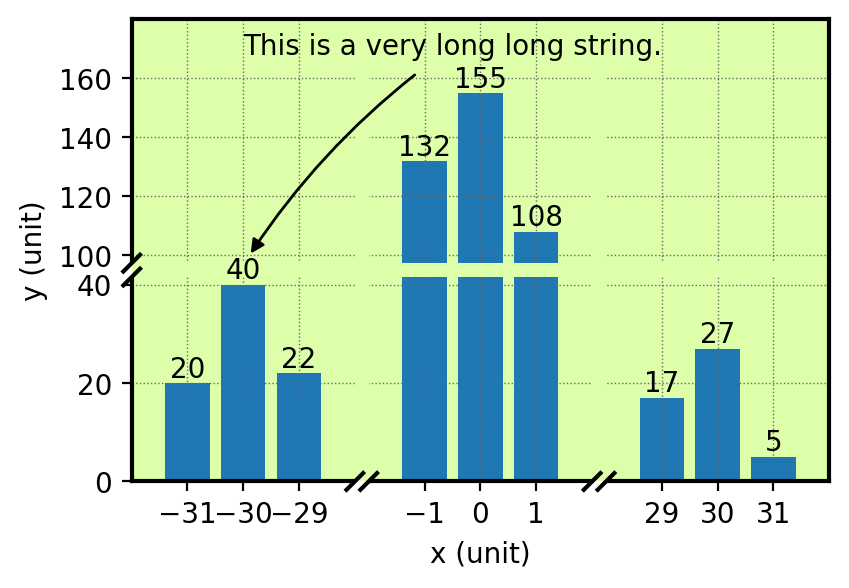

In [3]:
fig, ax = plt.subplots(figsize=(4.5,3))
ax.set(xlim=(-32,32), ylim=(0,180), xlabel="x (unit)", ylabel="y (unit)")
ax.set_facecolor("#DDFFAA")
ax.grid(ls=':', lw=0.5, color='dimgray')

# scale x-axis and y-axis to reduce the blank space
scale_axes(ax,
           x_interval=[(-28, -2, 0.01), (2, 28, 0.01)],
           y_interval=[(40,100, 0.1), (100, 180, 0.6)], 
           mode="linear")


_ = ax.set_xticks([-31,-30,-29,-1,0,1,29,30,31])
_ = ax.set_yticks([0,20, 40, 100, 120, 140,160])

rects = ax.bar([-31,-30,-29,-1,0,1,31,30,29], [20,40,22,132,155,108,5,27,17] )
ax.bar_label(rects)

# Text and Annotation wont be clipped
ax.annotate("This is a very long long string.", xy=(-30, 80), xytext=(-30, 168), 
    arrowprops=dict(
        arrowstyle='-|>',
        connectionstyle="arc3,rad=0.1", 
        color='k', 
        shrinkA=5, shrinkB=5
    )
)

# Add broken line in x-axis and y-axis, clip spines and artists in axes
broken_and_clip_axes(ax, x=[-15,15], y=[70], axes_clip=True, which='lower',
                     gap=5, dx=3, dy=3)

# plt.savefig("break_axes_bar.png", transparent=False)

## Log Axes


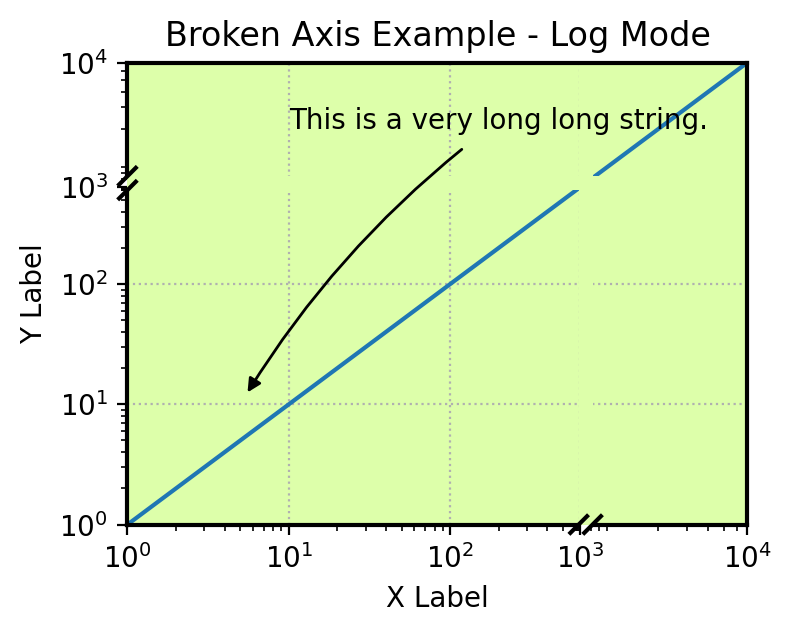

In [4]:
import numpy as np

x = np.logspace(0, 4, 100)

fig, ax = plt.subplots(figsize=(4,3))
ax.set(xlim=(1,10000), ylim=(1,10000), facecolor="#DDFFAA")  
ax.plot(x, x)
ax.set_xticks([1, 10, 100, 500, 5000, 10000],
              [1, 10, 100, 500, 5000, r'$10^4$'])
ax.set_yticks([1, 10, 100, 500, 5000, 10000],
              [1, 10, 100, 500, 5000, r'$10^4$'])

ax.annotate("This is a very long long string.", 
    xy=(5, 10), xytext=(10, 5000), 
    arrowprops=dict(
        arrowstyle='-|>',
        connectionstyle="arc3,rad=0.1", 
        color='k', 
        shrinkA=5, shrinkB=5
    )
)

ax.grid(ls=':')
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_title("Broken Axis Example - Log Mode")

scale_axes(ax, 
    x_interval=[(600, 4000, 0.1)], 
    y_interval=[(600, 4000, 0.1)],
    mode='log')
broken_and_clip_axes(ax, x=[1500], y=[1500], 
    axes_clip=True, which='lower', gap=5, dx=3, dy=3)

plt.show()